

### Dataset Summary

The dataset contains 1,503 entries and 6 features. Here's the breakdown of the features:

1. **f (Frequency, Hz)**: Integer values representing the frequency of the airfoil's noise.
2. **alpha (Angle of attack, degrees)**: Float values for the angle of attack of the airfoil.
3. **c (Chord length, meters)**: Float values indicating the chord length of the airfoil.
4. **U_infinity (Free-stream velocity, m/s)**: Float values for the velocity of the air passing the airfoil.
5. **delta (Displacement thickness, meters)**: Float values representing the displacement thickness.
6. **SSPL (Sound Pressure Level, dB)**: Float values for the sound pressure level, which is the target variable for regression.


In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Machine Learning

from sklearn.ensemble import GradientBoostingRegressor

In [2]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1L0-cwuTGWHYUlI2GKKHXtVWjZS5GMXBK/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Airfoil Self-Noise.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Airfoil Self-Noise.csv')
data.head(20)


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [3]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


(None,
                   f        alpha            c   U_infinity        delta  \
 count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
 mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
 std     3152.573137     5.918128     0.093541    15.572784     0.013150   
 min      200.000000     0.000000     0.025400    31.700000     0.000401   
 25%      800.000000     2.000000     0.050800    39.600000     0.002535   
 50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
 75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
 max    20000.000000    22.200000     0.304800    71.300000     0.058411   
 
               SSPL  
 count  1503.000000  
 mean    124.835943  
 std       6.898657  
 min     103.380000  
 25%     120.191000  
 50%     125.721000  
 75%     129.995500  
 max     140.987000  )

In [4]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values


,0
f,0
alpha,0
c,0
U_infinity,0
delta,0
SSPL,0


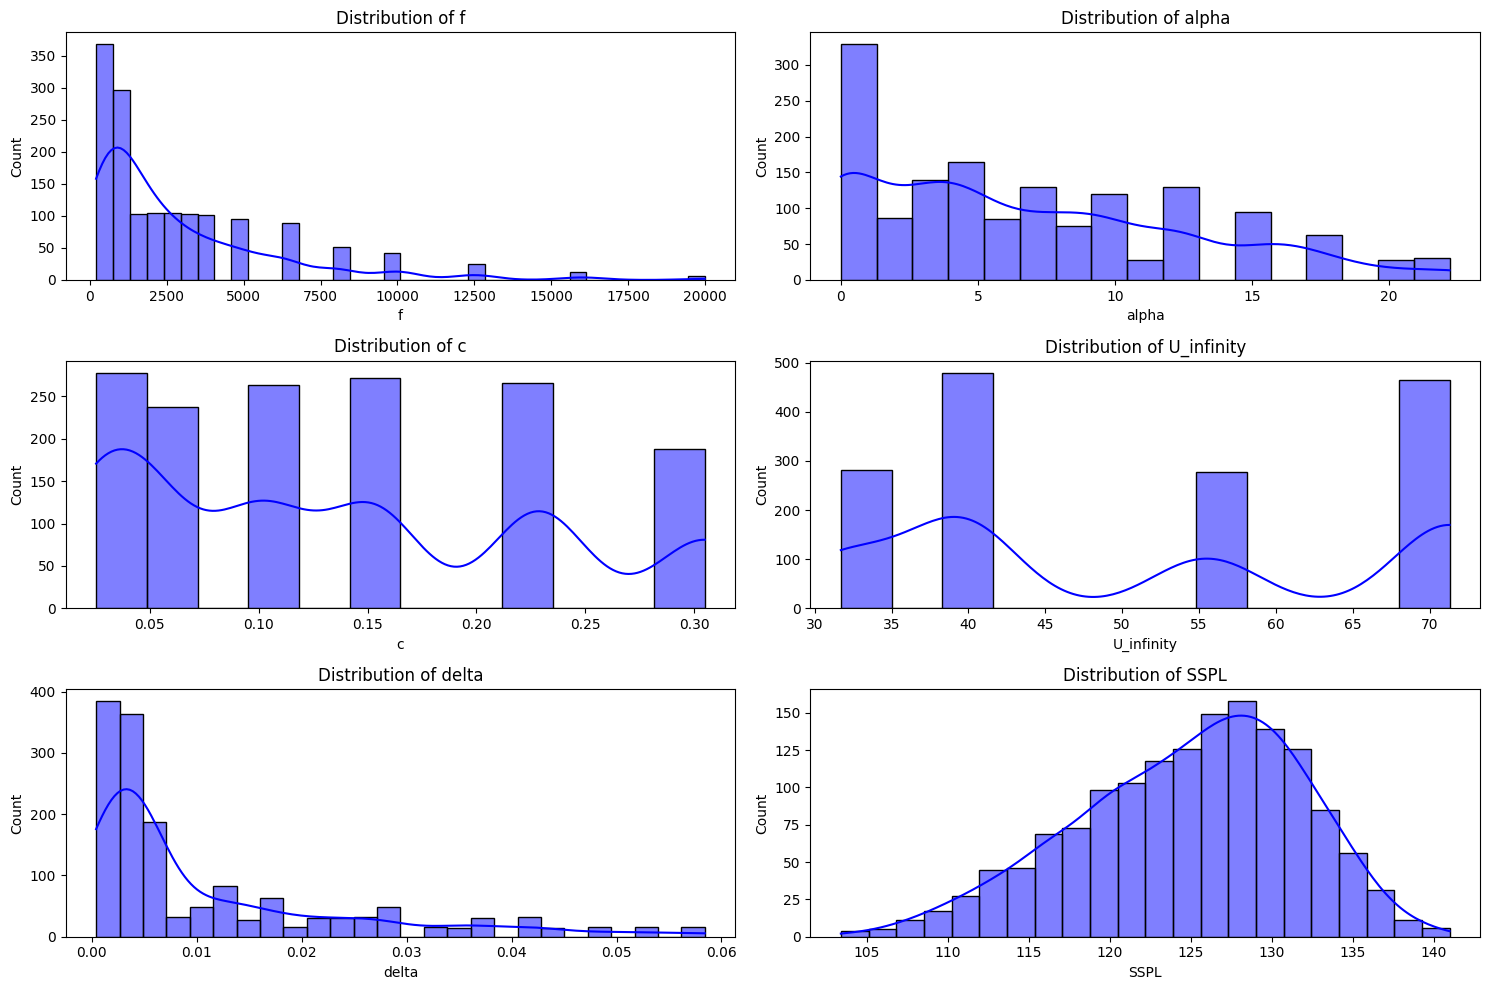

In [5]:
# Plot distributions for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


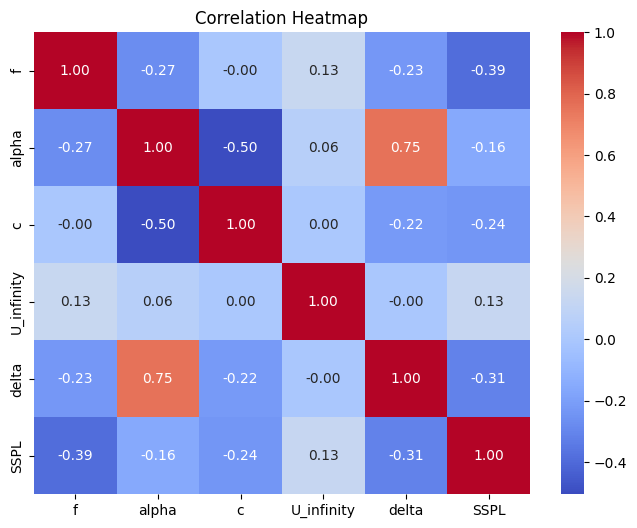

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Separate features and target variable
X = data.drop('SSPL', axis=1)  # Features are all columns except 'SSPL'
y = data['SSPL']  # Target variable is 'SSPL'

#  Normalize the features and target
scaler_X = StandardScaler() # create a scaler for X
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler() # create a scaler for y
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1202, 5), (301, 5), (1202, 1), (301, 1))

In [8]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create a GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5 , verbose=2, n_jobs=-1)


# Fit the model
grid_search.fit(X_train, y_train) # .ravel() flattens the y_train array

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error (MSE): 0.03856113420175387
R-squared (R2): 0.9633929771898295
Mean Absolute Error (MAE): 0.12678793720827142


In [9]:
import joblib

# Save the trained model
joblib.dump(best_gbr, 'best_gbr_model.pkl')

# Save the scaler for X
joblib.dump(scaler_X, 'scaler_X.pkl')

# Save the scaler for y
joblib.dump(scaler_y, 'scaler_y.pkl')


['scaler_y.pkl']

In [10]:


# Load the saved model
loaded_model = joblib.load('best_gbr_model.pkl')

# Load the saved scaler for X
loaded_scaler_X = joblib.load('scaler_X.pkl')

# Load the saved scaler for y
loaded_scaler_y = joblib.load('scaler_y.pkl')

# Example of new data (replace with your actual data)
new_data = pd.DataFrame({
    'f': [800, 1000, 1200],
    'alpha': [0.0, 0.5, 1.0],
    'c': [0.3, 0.3, 0.3],
    'U_infinity': [50, 50, 50],
    'delta': [0.001, 0.001, 0.001]
})


# Scale the new data using the loaded scaler for X
new_data_scaled = loaded_scaler_X.transform(new_data)

# Make predictions on the new scaled data
new_predictions_scaled = loaded_model.predict(new_data_scaled)

# Inverse transform the predictions to get them back to the original scale
new_predictions = loaded_scaler_y.inverse_transform(new_predictions_scaled.reshape(-1, 1))

print("New Predictions:")
new_predictions

New Predictions:


array([[124.30018183],
       [124.29243166],
       [126.01231944]])